In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 samples
n_samples=1000

In [3]:
#Create Labels and Features
X,y=make_circles(n_samples,noise=0.03,random_state=42)

Lets Visualize the data as it is hard to understand

In [4]:
import pandas as pd 

In [5]:
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Visualize it with  a Plot 

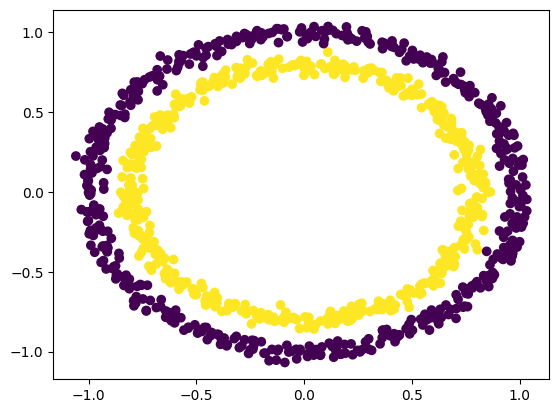

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(circles["X0"],circles["X1"],c=y)
plt.show()

Second Way of Visualization

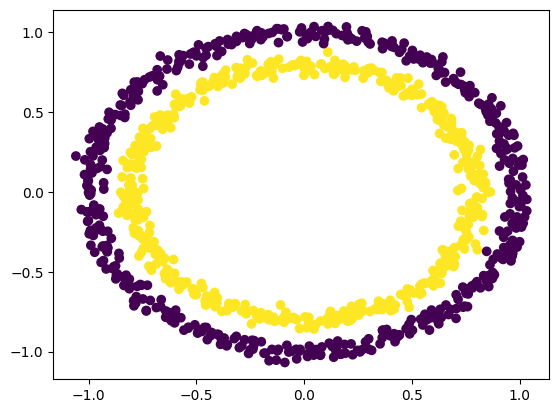

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

Model Creation


In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)
# Model 1 
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model1.fit(X,y,epochs=5,verbose=0)

In [12]:
model1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4670 - loss: 7.1937


[7.193748950958252, 0.46700000762939453]

Improve model by introducing a hidden a layer

In [13]:
tf.random.set_seed(42)
# Model 2 
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model2.fit(X,y,epochs=100,verbose=0)

In [14]:
model2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 0.6932


[0.6932458281517029, 0.5]

Again Try to improve again by changing optimizer , increasing hidden units and layers

In [15]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(X,y,epochs=100,verbose=0)

In [16]:
model3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4960 - loss: 0.6961 


[0.6961240172386169, 0.4959999918937683]

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model,X,y):

    # Define axis boundraies for of the plot and create a meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
    y_min,y_max=X[:,1].min()+0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    # Create X value to make predictions on these
    x_in=np.c_[xx.ravel(),yy.ravel()]   # Stacks 2d array together

    # Make Predictions
    y_pred=model.predict(x_in)
    
    # check for multi-class 
    if len(y_pred[0])>1:
        print('You are doing multi-class classification')
        # Reshape Predictions to get ready for plotting 
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing Binary Classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    # Plot Decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


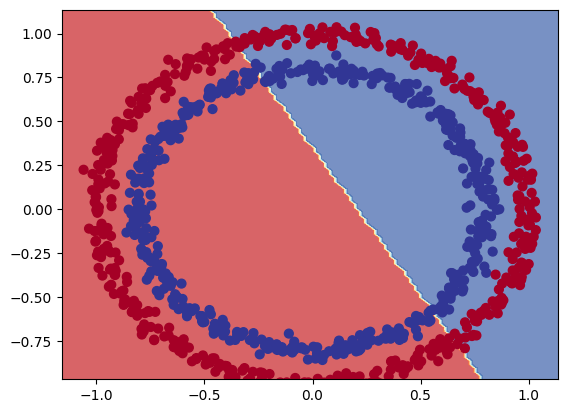

In [19]:
plot_decision_boundary(model3,X,y)

as our model is predicting a straight line 
lets try to fit it on straight data or linear data 


In [20]:
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)
len(X_regression),len(y_regression)

(200, 200)

In [21]:
# Train Test Split

X_train_regression = tf.expand_dims(X_regression[:150], axis=-1)  # Shape: (150, 1)
X_test_regression  = tf.expand_dims(X_regression[150:], axis=-1)  # Shape: (50, 1)

y_train_regression=y_regression[:150]
y_test_regression=y_regression[150:]




In [22]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model3.fit(X_train_regression,y_train_regression,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 505.5681 - mae: 505.5681
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 461.7497 - mae: 461.7497
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 427.4928 - mae: 427.4928 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 404.1522 - mae: 404.1522
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 389.7111 - mae: 389.7111
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 374.1678 - mae: 374.1678
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 357.3964 - mae: 357.3964 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 339.4095 - mae: 339.4095
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 320.1593 - mae: 320.1593
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 299.5961 - mae: 299.5961
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 277.8170 - mae: 277.8170
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 254.5269 - mae: 254.5269

In [23]:
y_pred_reg=model3.predict(X_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


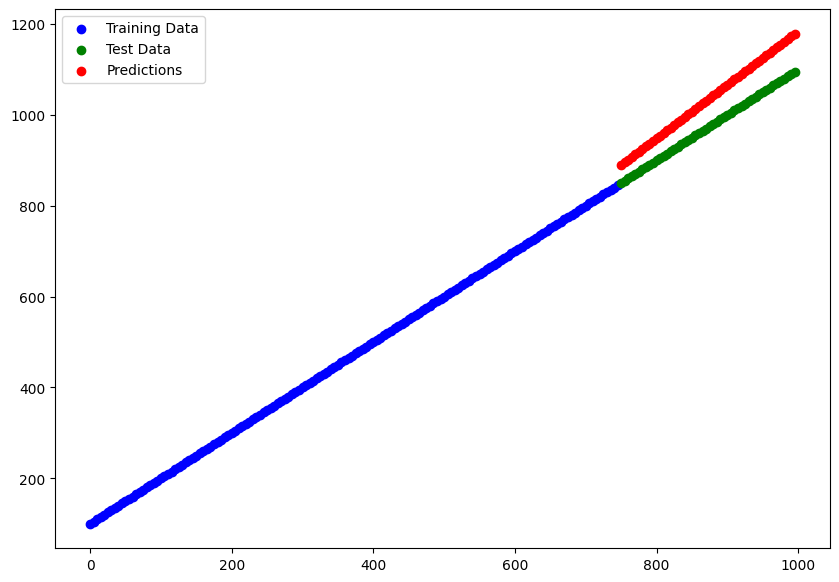

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg,c='r',label='Predictions')
plt.legend();

In [25]:
tf.random.set_seed(42)
# Model3 Improvised
model3_improvised=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3_improvised.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])
model3_improvised.fit(X_train_regression,y_train_regression,epochs=230)

Epoch 1/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 369.0870 - mae: 369.0870
Epoch 2/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 151.1137 - mae: 151.1137
Epoch 3/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 104.9436 - mae: 104.9436
Epoch 4/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 109.9991 - mae: 109.9991
Epoch 5/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.6703 - mae: 74.6703
Epoch 6/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 59.6837 - mae: 59.6837
Epoch 7/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.6593 - mae: 52.6593
Epoch 8/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.2368 - mae: 46.2368
Epoch 9/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.0108 - mae: 45.0108
Epoch 10/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.6400 - mae: 43.6400
Epoch 11/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.0326 - mae: 44.0326
Epoch 12/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.0562 - mae: 42.0562
Epoch 13/230
5/5 

In [26]:
y_pred_reg_improvised=model3_improvised.predict(X_test_regression)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/stepWARNING:tensorflow:6 out of the last 317 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001CA3F2CDA80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


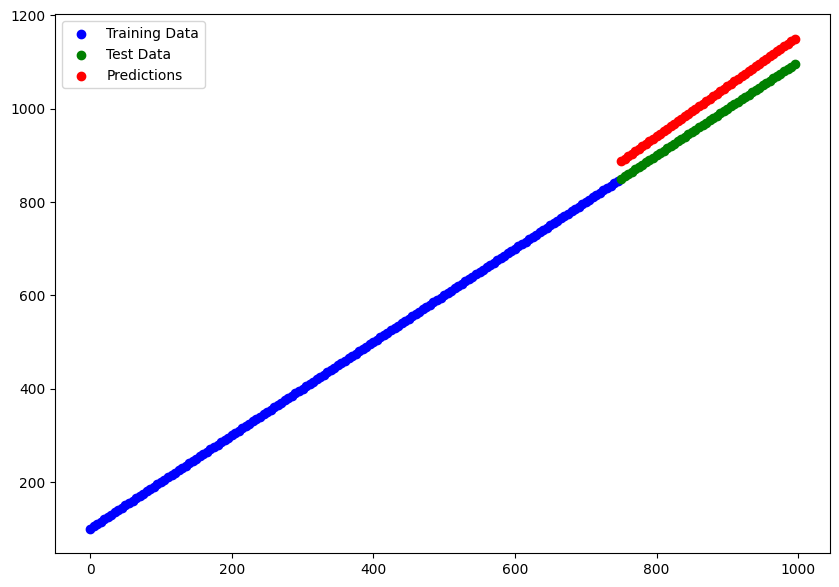

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg_improvised,c='r',label='Predictions')
plt.legend();

In [28]:
model3_improvised.evaluate(X_test_regression,y_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 45.9002 - mae: 45.9002 


[45.900184631347656, 45.900184631347656]

**Lets now See Linearity and Non-linearity**
> Staright and Not-Straight Lines

Linear Model with linear activation

In [29]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
model_4.fit(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4810 - loss: 6.1807


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


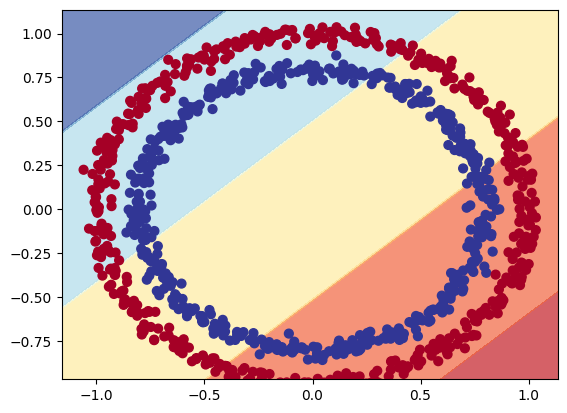

In [30]:
plot_decision_boundary(model_4,X,y)

First NN with non linear activation


In [31]:
tf.random.set_seed(42)

model5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
])
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4830 - loss: 6.0705
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4810 - loss: 5.9954
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4820 - loss: 5.9583
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4800 - loss: 5.9170
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4810 - loss: 5.9114
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4810 - loss: 5.8998
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4810 - loss: 5.8622
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 5.8272
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4790 - loss: 5.7426
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4800 - loss: 5.7173
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4780 - loss: 5.6803
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [32]:
model5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4640 - loss: 4.6601


[4.660054683685303, 0.46399998664855957]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


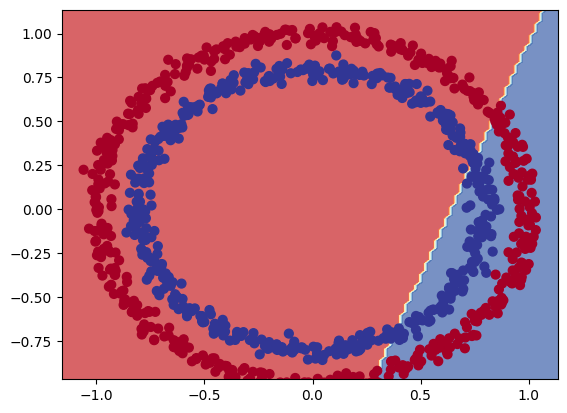

In [33]:
plot_decision_boundary(model5,X,y)

**As our model is still guessing so add more Layers with non linear activation**
* Add few more hidden layers 2 hidden layers
* Add few units like 4 units

In [34]:
tf.random.set_seed(42)

model6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])
model6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [35]:
model6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 8.0590


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification


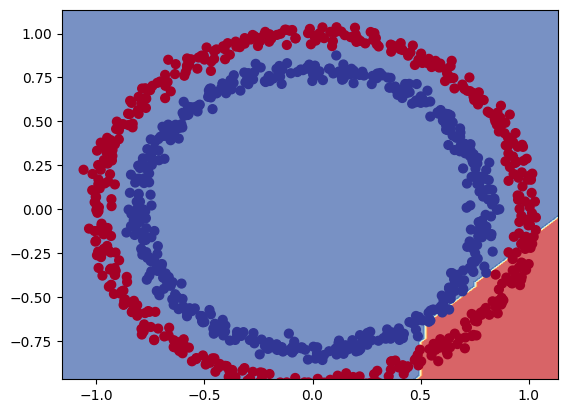

In [36]:
plot_decision_boundary(model6,X,y)

>Time To reveal our last trick in Bag 
* Added actiavtion sigmoid for last activation function

Last step to fix this now

In [37]:
tf.random.set_seed(42)
# Model Final
Final_model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

Final_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])
history=Final_model.fit(X,y,epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5010 - loss: 0.6948
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5090 - loss: 0.6937
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5090 - loss: 0.6930
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5140 - loss: 0.6925
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5120 - loss: 0.6919
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5150 - loss: 0.6915
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 0.6910
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5240 - loss: 0.6905
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5310 - loss: 0.6899
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5350 - loss: 0.6892
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5360 - loss: 0.6882
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [38]:
Final_model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9970 - loss: 0.0181 


[0.01806020364165306, 0.996999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


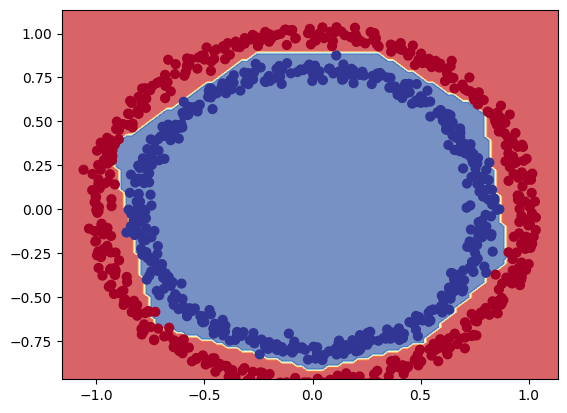

In [39]:
plot_decision_boundary(Final_model,X,y)

**Trying again to obtain acuuracy more quickly**
* Keeping learning rate a bit higher 
* Reducing epochs 10 times

In [40]:
len(X)

1000

In [41]:
# Spliting first data into three datasets

X_train,X_test,y_train,y_test=X[:800],X[800:],y[:800],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [42]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

In [43]:
history=model_8.fit(X_train,y_train,epochs=35)

Epoch 1/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4800 - loss: 0.6923
Epoch 2/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5375 - loss: 0.6864
Epoch 3/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5813 - loss: 0.6776
Epoch 4/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5813 - loss: 0.6620
Epoch 5/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6587 - loss: 0.6281
Epoch 6/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7225 - loss: 0.5755
Epoch 7/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7638 - loss: 0.5185
Epoch 8/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8087 - loss: 0.4655
Epoch 9/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8275 - loss: 0.4265
Epoch 10/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.3993
Epoch 11/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8438 - loss: 0.3815
Epoch 12/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8550 - lo

In [44]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9900 - loss: 0.0326 


[0.032574377954006195, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


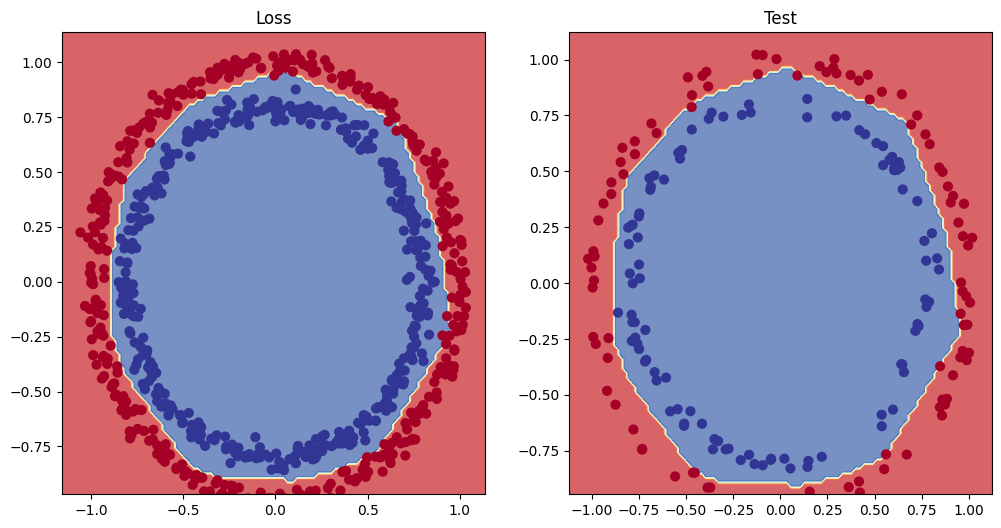

In [45]:
# Plotting 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Loss')
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

**Plot Model Loss Curve**

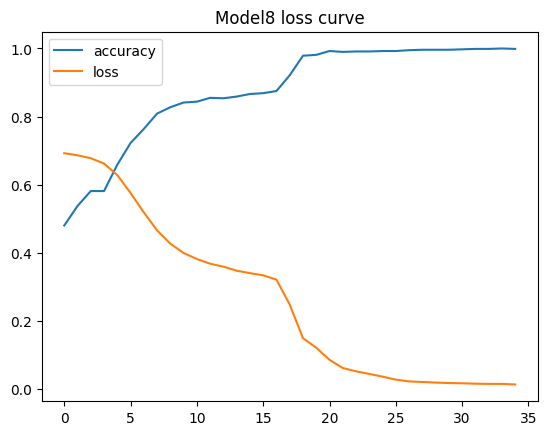

In [46]:
pd.DataFrame(history.history).plot()
plt.title('Model8 loss curve')
plt.show();

**Creating a callback to obtain an ideal learning rate**
* ideal learning rate means Lr where the loss decreses the most during training

In [49]:
# Creating model same as model_8 but with lr_schedular

tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [50]:
# Creating a callback as it runs during training 

lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [51]:
history_9=model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_schedular])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4925 - loss: 0.6928 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4963 - loss: 0.6926 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4988 - loss: 0.6924 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5038 - loss: 0.6923 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5025 - loss: 0.6920 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5075 - loss: 0.6918 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5050 - loss: 0.6915 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 0.6913 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5013 - loss: 0.6910 - learning_

<Axes: xlabel='epochs'>

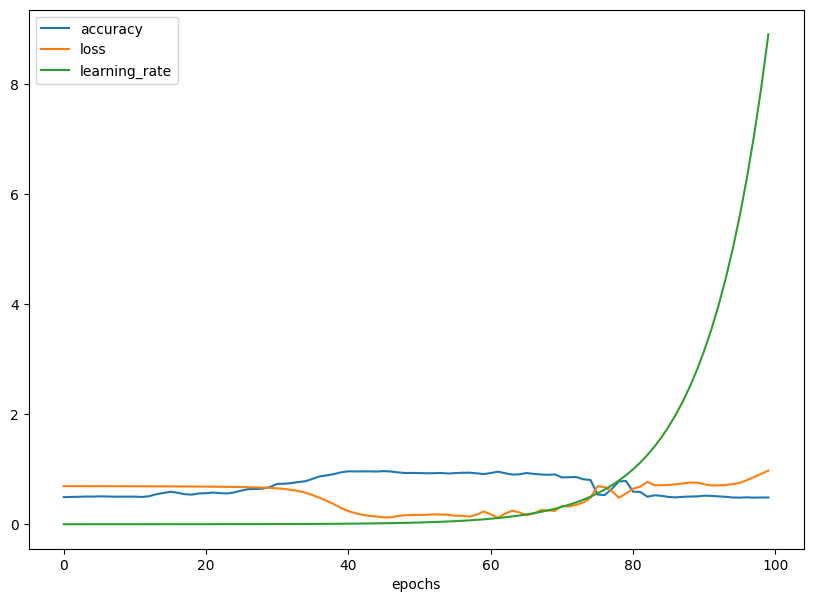

In [53]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 1.0, 'learning rate vs loss ')

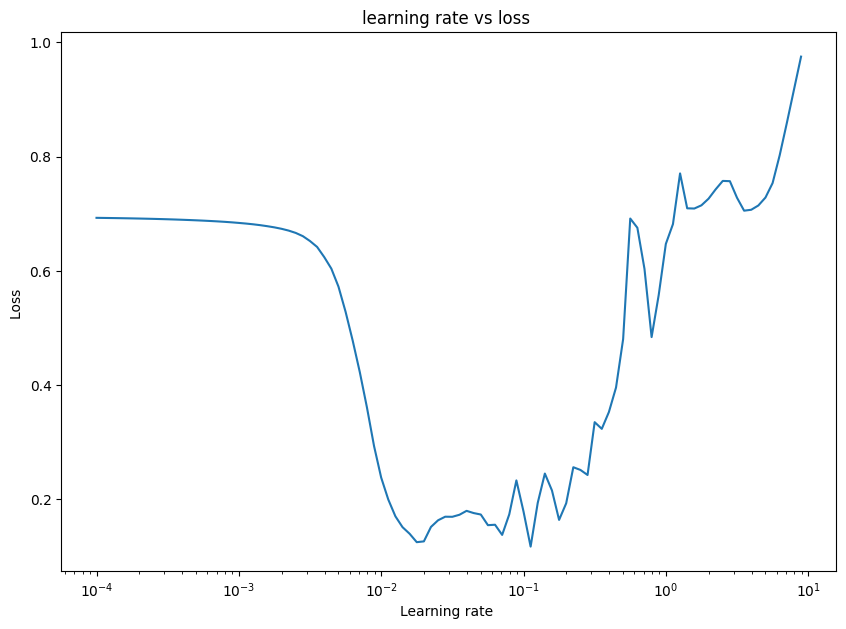

In [55]:
# Lets visualize learning rate vs loss
lrs=1e-4 *(10 **(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history['loss'])
plt.xlabel("Learning rate ")
plt.ylabel("Loss ")
plt.title('learning rate vs loss ')

**Training and Evaluating A mode with an ideal learning rate**

In [59]:
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

In [60]:
history_10=model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5088 - loss: 0.6909
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5713 - loss: 0.6814
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6275 - loss: 0.6596
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6762 - loss: 0.6170
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7300 - loss: 0.5458
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8263 - loss: 0.4697
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8662 - loss: 0.4044
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9038 - loss: 0.3227
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9625 - loss: 0.2332
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9812 - loss: 0.1718
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9937 - loss: 0.1263
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accura

In [61]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9900 - loss: 0.0186 


[0.018575966358184814, 0.9900000095367432]

In [63]:
model_9.evaluate(X_train,y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5013 - loss: 0.7577


[0.7577020525932312, 0.5012500286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification


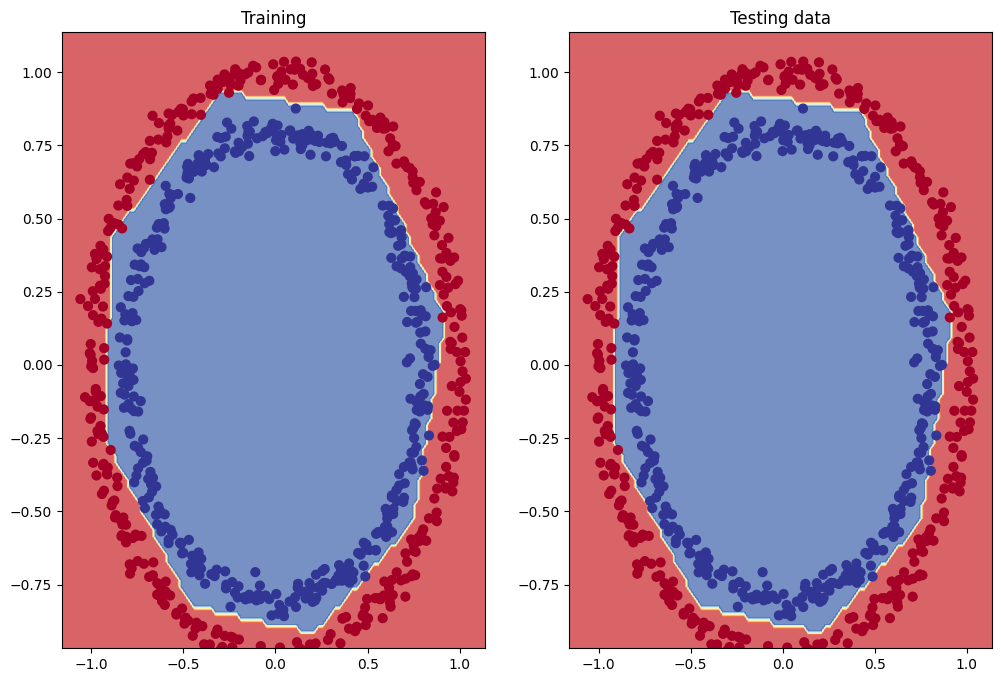

In [64]:
# Plot Decison boundry for Train and Test
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing data')
plot_decision_boundary(model_10,X_train,y_train)

**Classification evaluation methods**
* Accuracy
* Precision
* Recall
* F1_Score
* Confusion Matrix
* Classification Report


In [75]:
# Accuracy first
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f'The test Loss is {(loss):.4f}')
print(f'The Model Accuracy is {(accuracy*100):.2f} %')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9900 - loss: 0.0186
The test Loss is 0.0186
The Model Accuracy is 99.00 %


In [80]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
# Make predictions first
y_pred_m10=model_10.predict(X_test)
y_pred_m10=np.round(y_pred_m10) # as our labels are in binary format so we need make predictions also binary
# Confusion Matrix 
confusion_matrix(y_test,y_pred_m10)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[99,  2],
       [ 0, 99]])

Pretty Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_pretty_confusion_matrix(cm):
    # Auto-generate class names as Class 0, Class 1, etc.
    num_classes = cm.shape[0]
    class_names = [f"Class {i}" for i in range(num_classes)]
    
    plt.figure(figsize=(6, 5))
    
    # Color map with shades
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                xticklabels=class_names, yticklabels=class_names,
                cbar=False, linewidths=1, linecolor='gray')

    plt.title("Confusion Matrix", fontsize=16, pad=15)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)

    # Adding simple explanations
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            value = cm[i][j]
            if i == j:
                text = f"Correct: {value}"
            else:
                text = f"Wrong: {value}"
            plt.text(j + 0.5, i + 0.5, f"\n{text}", 
                     ha='center', va='center', fontsize=9, color='black')
    
    plt.tight_layout()
    plt.show()

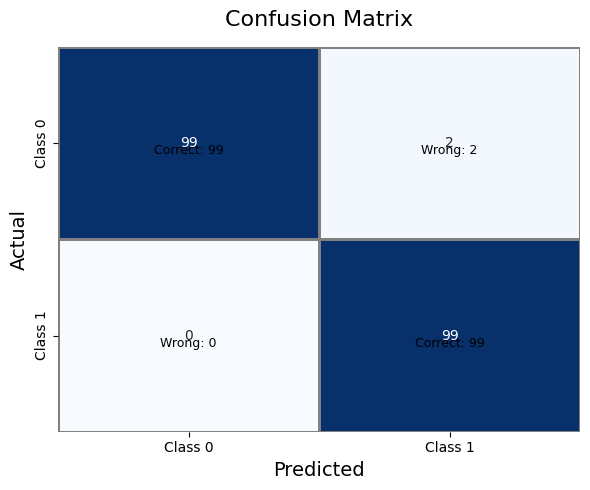

In [83]:
cm=confusion_matrix(y_test,y_pred_m10)
plot_pretty_confusion_matrix(cm)

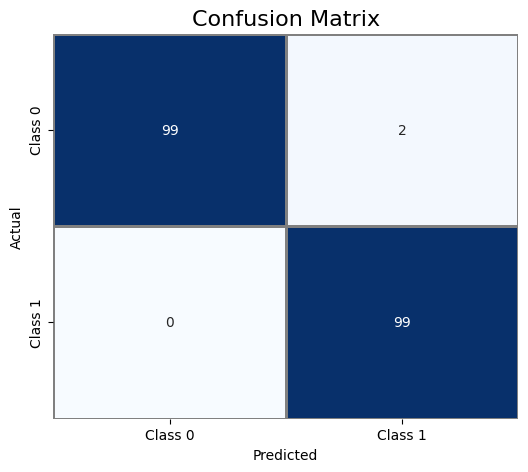

In [90]:
# Easiest way for Prettying Confusion Matrix
def pretty_cm(cm):
    classes = [f"Class {i}" for i in range(cm.shape[0])]
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=classes, yticklabels=classes,
                cbar=False, linewidths=1, linecolor='gray')
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()
pretty_cm(cm)